# Integracia dat

<!--
navody na pouzivanie pandas, matplotlib a numpy na spracovanie dat. Niesu to informacie o tom ako robit explorativnu analyzu, ale ako pouzivat kniznice

Z tohoto povyberam zaujimave casti, spojim ich s nejakou kapitolou v knihe o tom ako riesit spracovanie, cistanie dat a transformovanie dat
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_10_pandas_introduction.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_11_pandas_adding_data.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_12_pandas_groupby.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_13_pandas_movies.ipynb 
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_14_pandas_reshape.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_15_pandas_transforming.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_21_pandas_processing.ipynb
http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_22_pandas_cleaning.ipynb

http://nbviewer.jupyter.org/github/ResearchComputing/Meetup-Fall-2013/blob/master/python/lecture_23_titanic_example.ipynb
-->

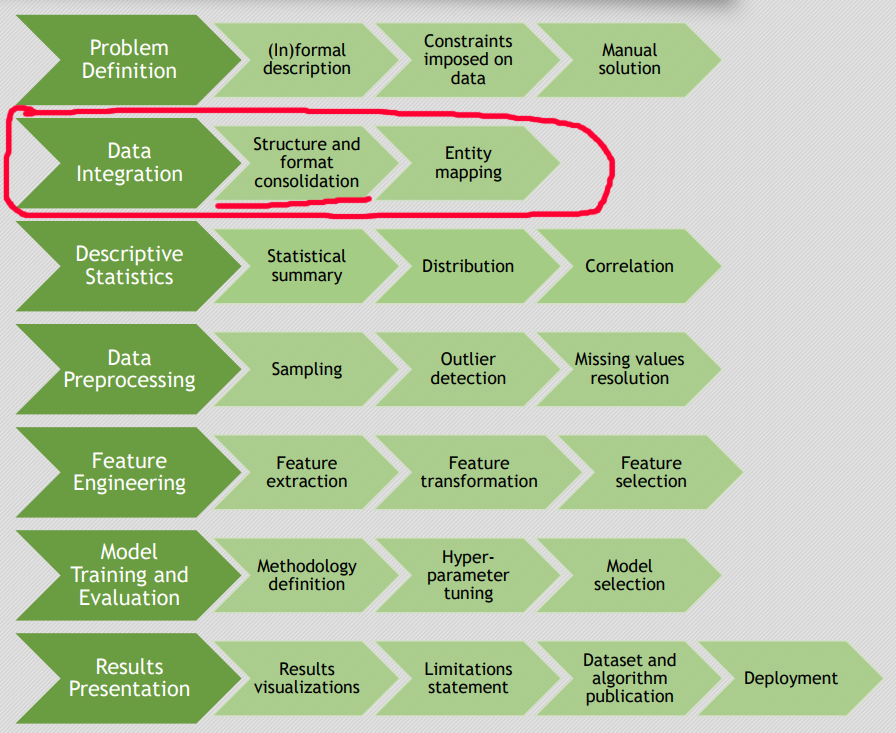

In [1]:
from IPython.display import Image
Image('ML_Workflow.PNG')

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Skusme sa pohrat s nejakymi datami

In [3]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012")
data.head()

,1990-01-01 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0 -999.000 0
0,1990-01-02\t-999.000\t0\t-999.000\t0\t-999.000...
1,1990-01-03\t51.000\t1\t50.000\t1\t47.000\t1\t4...
2,1990-01-04\t-999.000\t0\t-999.000\t0\t-999.000...
3,1990-01-05\t51.000\t1\t51.000\t1\t48.000\t1\t5...
4,1990-01-06\t-999.000\t0\t-999.000\t0\t-999.000...


Vidime, ze pri nacitani nastalo viacero problemov - vsetky data skoncili v jednom stlpci a navyse prvy riadok bol automaticky interpretovany ako hlavicka. Skusme sa teda pozriet na data v nejakom editore (postaci aj konzola) predtym, ako ich nacitame:

In [4]:
%%bash
head data/BETR8010000800100hour.1-1-1990.31-12-2012

1990-01-01	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0
1990-01-02	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	48.000	1	-999.000	0	-999.000	0	48.000	1	50.000	1	55.000	1	59.000	1	58.000	1	59.000	1	58.000	1	57.000	1	58.000	1	54.000	1	49.000	1	48.000	1
1990-01-03	51.000	1	50.000	1	47.000	1	48.000	1	51.000	1	52.000	1	58.000	1	57.000	1	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	69.000	1	74.000	1	-999.000	0	-999.000	0	103.000	1	84.000	1	75.000	1	-999.000	0	-999.000	0	-999.000	0
1990-01-04	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	-999.000	0	67.000	1	57.000	1	57.000	1	-999.000	0	71.000	1	74.000	1	70.000	1	70.000	1	69.000	1	65.000	1	64

z tohoto zatial vieme asi len to, ze pojde o csv format, separator hodnot je \t, su tam same numericke data a nemame pomenovane atributy

Mozno este predtym ako som sa pokusal nacitat to csv som sa mohol aspon trochu pozriet na ten subor. usetril by som si jedno volanie. A ak by bol ten subor nejaky velmi velky, tak mozno aj nejake dalsie komplikacie

In [5]:
%%bash
ls -lh data/BETR8010000800100hour.1-1-1990.31-12-2012

-rwxr--r--+ 1 sevo_ sevo_ 1.9M Oct 10 21:51 data/BETR8010000800100hour.1-1-1990.31-12-2012


In [6]:
%%bash 
wc -l data/BETR8010000800100hour.1-1-1990.31-12-2012

8392 data/BETR8010000800100hour.1-1-1990.31-12-2012


Takze tych dat nieje zas tak vela a nemusim sa bat to vsetko nacitat do pamate

In [7]:
data = pd.read_csv("data/BETR8010000800100hour.1-1-1990.31-12-2012", sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1990-01-01,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
1,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
3,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


Mame 49 stlpcov. Datum a 48 dalsich. kazdy druhy sa zda byt binarny. Asi nejaky flag 

Data su tvorene meraniami nejakej veliciny asi v jednotlivych hodinach dna. 

Co den, to riadok. Kazda hodina ma zvlast stlpec + je tu stlpec pre nejaky flag, ktory nas teraz nezaujima

Su tam nejak divne hodnoty, ktore by tam asi nemali byt -999 a -9999

Datum bude asi index

In [8]:
filename = "data/BETR8010000800100hour.1-1-1990.31-12-2012"

data = pd.read_csv(filename, sep='\t', header=None,
                   na_values=[-999, -9999], index_col=0)
# vela upratovania dat vieme spravit uz pri nacitani
data.head()

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,1,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,1,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


In [9]:
# skusime povyhadzovat tie flagy, ktore nas nezaujimaju. Zhodou okolnosti je to kazdy druhy stlpec
data.columns[1::2]

Int64Index([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
            36, 38, 40, 42, 44, 46, 48],
           dtype='int64')

In [10]:
data = data.drop(data.columns[1::2], axis=1)
data.head()

,1,3,5,7,9,11,13,15,17,19,...,29,31,33,35,37,39,41,43,45,47
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Skusme si nejak normalne pomenovat vzniknute stlpce
["{:02d}".format(i) for i in range(len(data.columns))]

['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [12]:
# mam nejako rozsypane nazvy stlpcov
data.columns = ["{:02d}".format(i) for i in range(len(data.columns))]
data.head()

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


teraz skusme presunut kazde meranie na samostatny riadok

In [13]:
data = data.stack()
data.head()

1990-01-02  09    48.0
            12    48.0
            13    50.0
            14    55.0
            15    59.0
dtype: float64

In [14]:
type(data) # vysledok preusporiadania je viacdimenzionalny Series objekt, a nie DataFrame. Ja chcem mat pekny data frame, tak s tim nieco spravime

pandas.core.series.Series

In [15]:
# mohli by sme nejak normalne pomenovat stlpec
# napriklad nazvom stanice
import os
_, fname = os.path.split(filename)
station = fname[:7]
print(filename)
print(station)

data/BETR8010000800100hour.1-1-1990.31-12-2012
BETR801


In [16]:
data = data.reset_index(name=station) #reset index mi z toho spravi data frame
# data = data.reset_index() #reset index mi z toho spravi data frame
print(type(data))
data.head()

<class 'pandas.core.frame.DataFrame'>


,0,level_1,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [17]:
data = data.rename(columns = {0:'date', 'level_1':'hour'})
data.head()

,date,hour,BETR801
0,1990-01-02,09,48.0
1,1990-01-02,12,48.0
2,1990-01-02,13,50.0
3,1990-01-02,14,55.0
4,1990-01-02,15,59.0


In [18]:
# teraz tomu vyrobime novy index z datumu a hodiny
data.index = pd.to_datetime(data['date'] + ' ' + data['hour'])
data.head()

,date,hour,BETR801
1990-01-02 09:00:00,1990-01-02,09,48.0
1990-01-02 12:00:00,1990-01-02,12,48.0
1990-01-02 13:00:00,1990-01-02,13,50.0
1990-01-02 14:00:00,1990-01-02,14,55.0
1990-01-02 15:00:00,1990-01-02,15,59.0


In [19]:
# a zmazeme nepotrebne stlpce
data = data.drop(['date', 'hour'], axis=1)
data.head()
# Teraz uz mame data, s ktorymi sa uz da nieco robit

,BETR801
1990-01-02 09:00:00,48.0
1990-01-02 12:00:00,48.0
1990-01-02 13:00:00,50.0
1990-01-02 14:00:00,55.0
1990-01-02 15:00:00,59.0


### Toto uz vyzera celkom pouzitelne

Ja mam tych suborov viac. Kazdy obsahuje data z inej meracej stanice. Aby som zjednodusil prezentaciu, tak predchadzajuci kod som dal do cyklu a vlozil do skriptu

In [20]:
import airbase
no2 = airbase.load_data()

In [21]:
no2.head(3)

,BETR801,BETN029,FR04037,FR04012
1990-01-01 00:00:00,NaN,16.0,NaN,NaN
1990-01-01 01:00:00,NaN,18.0,NaN,NaN
1990-01-01 02:00:00,NaN,21.0,NaN,NaN


In [22]:
no2.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28.0,67.0
2012-12-31 20:00:00,16.5,2.0,16.0,47.0
2012-12-31 21:00:00,14.5,2.5,13.0,43.0
2012-12-31 22:00:00,16.5,3.5,14.0,42.0
2012-12-31 23:00:00,15.0,3.0,13.0,49.0


In [23]:
no2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198895 entries, 1990-01-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 4 columns):
BETR801    170794 non-null float64
BETN029    174807 non-null float64
FR04037    120384 non-null float64
FR04012    119448 non-null float64
dtypes: float64(4)
memory usage: 7.6 MB


In [24]:
no2.describe()

,BETR801,BETN029,FR04037,FR04012
count,170794.000000,174807.000000,120384.000000,119448.000000
mean,47.914561,16.687756,40.040005,87.993261
std,22.230921,13.106549,23.024347,41.317684
min,0.000000,0.000000,0.000000,0.000000
25%,32.000000,7.000000,23.000000,61.000000
50%,46.000000,12.000000,37.000000,88.000000
75%,61.000000,23.000000,54.000000,115.000000
max,339.000000,115.000000,256.000000,358.000000


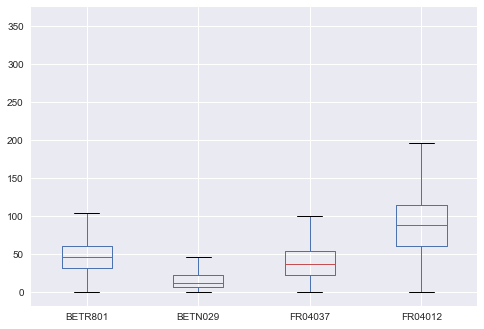

In [25]:
no2.plot(kind='box')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


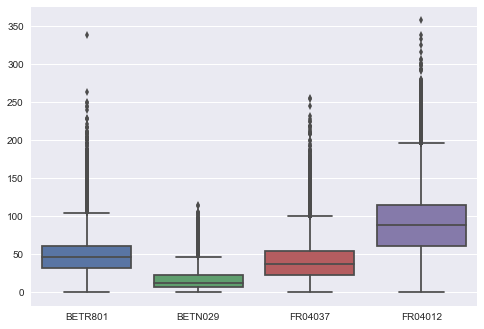

In [26]:
# boxplot vie ukazat aj outlierov
sns.boxplot(no2, sym='k.')

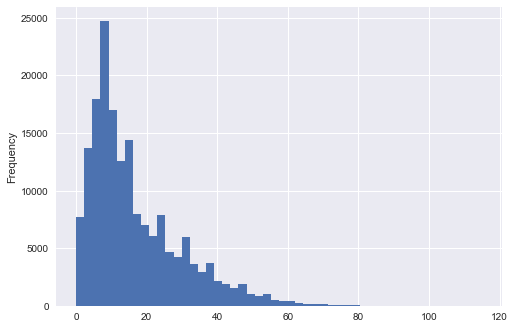

In [27]:
no2['BETN029'].plot(kind='hist', bins=50)

In [28]:
import seaborn

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2342: UserWarning: The violinplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


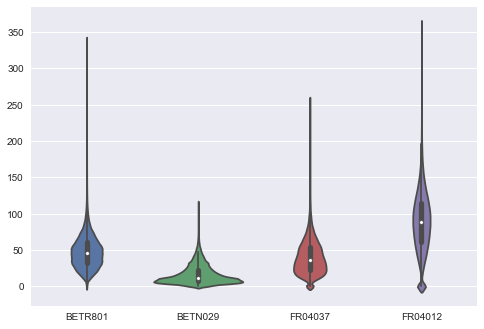

In [29]:
seaborn.violinplot(no2)

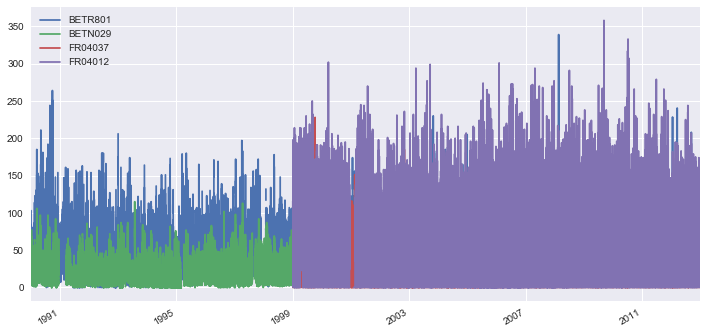

In [30]:
no2.plot(figsize=(12,6))
# mozem si vyplotovat surove data, ale je otazne, co mi to povie

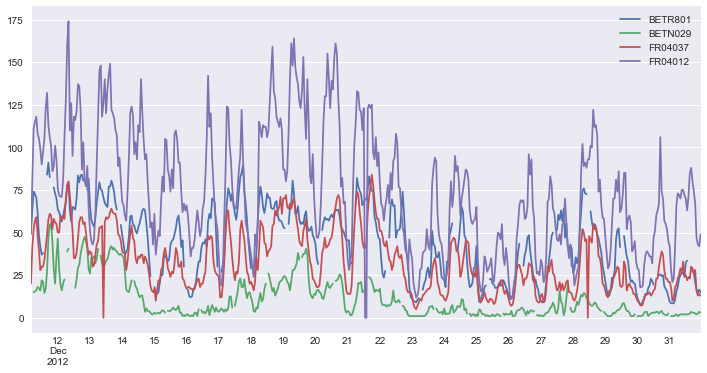

In [31]:
# mozem si povedat, ze chcem len nejaku mensiu cast
no2[-500:].plot(figsize=(12,6))

alebo pouzijem zaujimavejsie operacie s casovymi radmi

In [32]:
no2.index # kedze index su casy, tak viem robit s nimi zaujimave veci

DatetimeIndex(['1990-01-01 00:00:00', '1990-01-01 01:00:00',
               '1990-01-01 02:00:00', '1990-01-01 03:00:00',
               '1990-01-01 04:00:00', '1990-01-01 05:00:00',
               '1990-01-01 06:00:00', '1990-01-01 07:00:00',
               '1990-01-01 08:00:00', '1990-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=198895, freq=None)

In [33]:
no2["2010-01-01 09:00": "2010-01-01 12:00"] # napriklad definovat rozsahy pomocou stringu s datumom

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17.0,7.0,19.0,41.0
2010-01-01 10:00:00,18.0,5.0,21.0,48.0
2010-01-01 11:00:00,17.0,4.0,23.0,63.0
2010-01-01 12:00:00,18.0,4.0,22.0,57.0


In [34]:
no2['2012'] # alebo takto vybrat vsetky data z jedneho konkretneho roku
# no2['2012'].head()
# no2['2012/03'] # alebo len data z marca

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17.0,56.0
2012-01-01 01:00:00,18.0,1.0,16.0,50.0
2012-01-01 02:00:00,20.0,1.0,14.0,46.0
2012-01-01 03:00:00,16.0,1.0,17.0,47.0
2012-01-01 04:00:00,13.0,1.0,18.0,45.0
2012-01-01 05:00:00,17.0,1.0,15.0,36.0
2012-01-01 06:00:00,15.0,1.0,11.0,31.0
2012-01-01 07:00:00,13.0,1.0,12.0,30.0
2012-01-01 08:00:00,15.0,1.0,10.0,28.0
2012-01-01 09:00:00,15.0,1.0,12.0,42.0


In [35]:
# komponenty datumu su pristupne z indexu
# no2.index.hour
no2.index.year

array([1990, 1990, 1990, ..., 2012, 2012, 2012])

In [36]:
# a co je zaujimavejsie, viem zmenit vzorkovaciu frekvenciu
no2.resample('D').mean().head()

,BETR801,BETN029,FR04037,FR04012
1990-01-01,NaN,21.500000,NaN,NaN
1990-01-02,53.923077,35.000000,NaN,NaN
1990-01-03,63.000000,29.136364,NaN,NaN
1990-01-04,65.250000,42.681818,NaN,NaN
1990-01-05,63.846154,40.136364,NaN,NaN


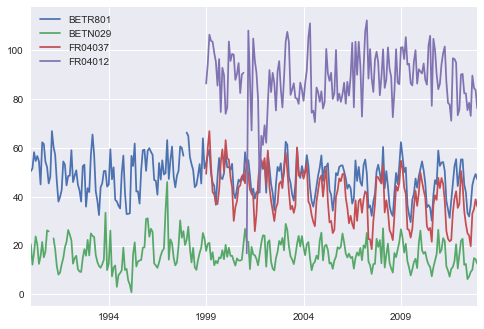

In [37]:
no2.resample('M').mean().plot()
# toto sa zda, ze povie uz trochu viac. Napriklad, ze je tu asi nejaka sezonnost

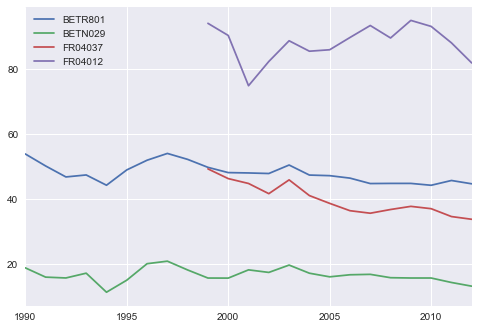

In [38]:
no2.resample('A').mean().plot()
# a mozno aj nejaky dlhodoby trend

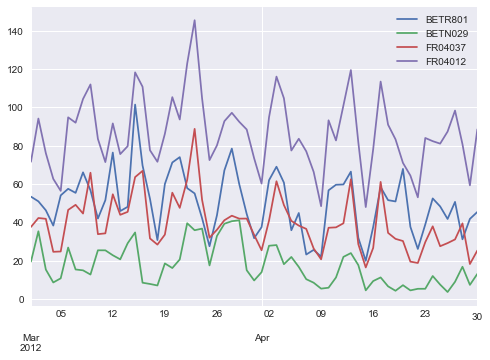

In [39]:
no2['2012-3':'2012-4'].resample('D').mean().plot()
# mozno je tam aj nejaka tyzdenna sezonnost

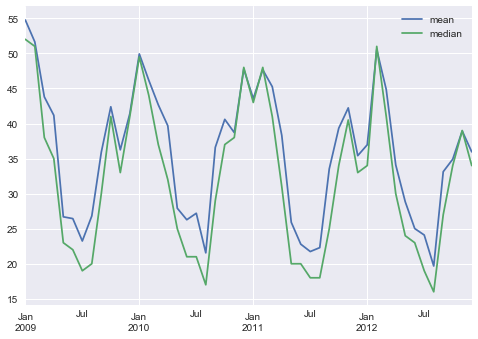

In [40]:
# mozem pouzit aj viacero agregacnych funkcii a porovnat si ich
no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'median']).plot()
# no2.loc['2009':, 'FR04037'].resample('M').agg(['mean', 'std']).plot()

## Pozor resample != groupby

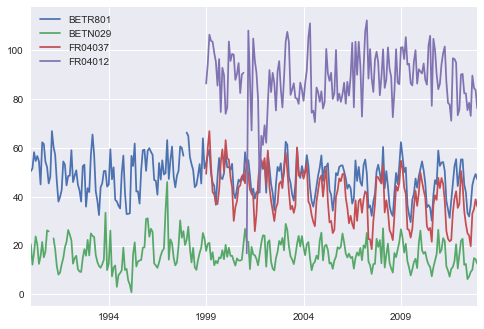

In [41]:
no2.resample('M').mean().plot()

Toto je casovy priebeh s mesacnou granularitou. Spriemerovane su hodnoty v priebehu mesiacu

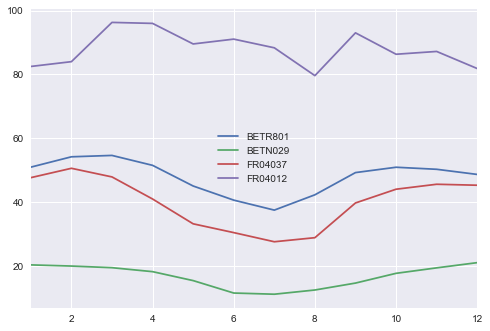

In [42]:
no2.groupby(no2.index.month).mean().plot()

Toto su spriemerovane vsetky hodnoty pre mesiac s danym cislom. Aj napriec rokmi. Ziskal som teda priemerny priebeh hodnoty pocas roka s mesacnou granularitou.

# Sumar, co si zobrat z tejto explorativnej analyzy

* Uisite sa, ze data su kodovane spravne (najcastejsie sa treba pozriet manualne do dat)
* Uistite sa, ze data spadaju do ocakavaneho rozsahu a vsetky maju ocakavany tvar (napriklad format casu)
* Nikdy nesahajte do dat manualne. Vzdy pouzivajte kod, ktory si odlozite a pouzijete vzdy, ked budete opakovat experiment. Chceme, aby bola analyza reprodukovatelna
* Spravte si grafy vsetkeho, co sa len da, aby ste si vizualne potvrdili, ze nieco je tak, ako by malo byt